<a href="https://colab.research.google.com/github/AlexanderF048/GOIT_DS/blob/main/HW_10_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow

from tensorflow import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics

import keras.backend
from keras.applications.vgg16 import VGG16

In [88]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [89]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

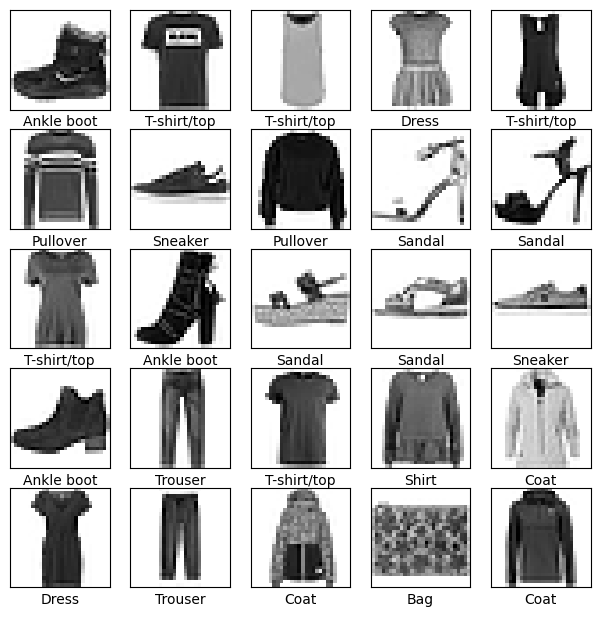

In [91]:
plt.figure(figsize=(7.5,7.5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [106]:
model = Sequential([
    Conv2D(32, (3, 3),
           activation="relu",
           input_shape=(28, 28, 1),
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3),
           activation="relu",
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3),
           activation="relu",
           dilation_rate=(1, 1),
           padding="same",
           ),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),

    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 64)       

In [93]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss= losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [98]:
history = model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=30,
    validation_split=0.2, #20% на тестовые экземпляры
)

print('---------------------------------------------------------------------------------------------------------------------')
print(history.history.keys())

Epoch 1/8
1600/1600 [==============================] - 84s 52ms/step - loss: 0.2017 - accuracy: 0.9264 - val_loss: 0.2786 - val_accuracy: 0.8981
Epoch 2/8
1600/1600 [==============================] - 81s 51ms/step - loss: 0.1908 - accuracy: 0.9308 - val_loss: 0.2732 - val_accuracy: 0.9028
Epoch 3/8
1600/1600 [==============================] - 79s 50ms/step - loss: 0.1853 - accuracy: 0.9327 - val_loss: 0.2877 - val_accuracy: 0.9051
Epoch 4/8
1600/1600 [==============================] - 84s 53ms/step - loss: 0.1815 - accuracy: 0.9348 - val_loss: 0.2873 - val_accuracy: 0.9040
Epoch 5/8
1600/1600 [==============================] - 79s 49ms/step - loss: 0.1764 - accuracy: 0.9354 - val_loss: 0.2843 - val_accuracy: 0.9119
Epoch 6/8
1600/1600 [==============================] - 79s 50ms/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.3281 - val_accuracy: 0.9040
Epoch 7/8
1600/1600 [==============================] - 79s 50ms/step - loss: 0.1697 - accuracy: 0.9388 - val_loss: 0.3032 - val_ac

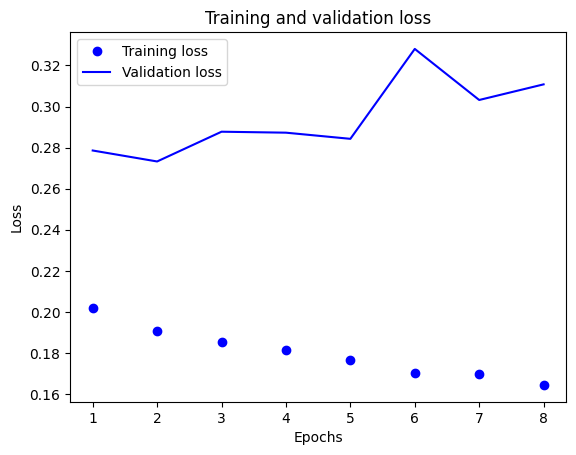

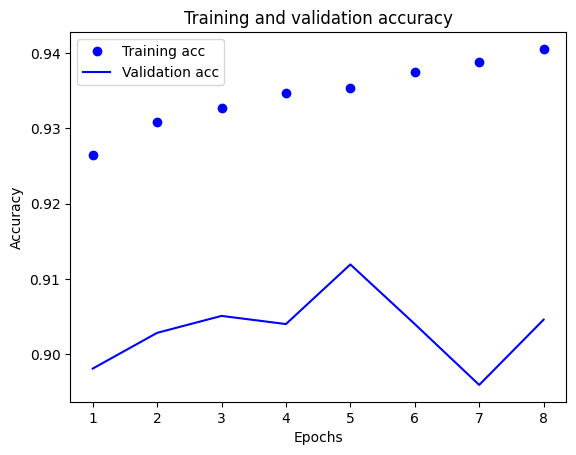

In [99]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

1/1 [==============================] - 0s 50ms/step
[[6.2896682e-13 3.5115990e-22 1.4975189e-13 2.1610395e-16 1.1699272e-13
  5.5425953e-05 7.2896507e-12 3.8878052e-04 3.5735770e-08 9.9955577e-01]]


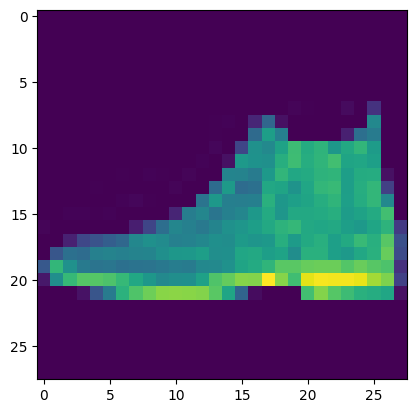

In [103]:
result = model.predict(x_test[:1])
print(result)
plt.imshow(x_test[:1].reshape(28, 28, 1))

**VGG16**

---



In [120]:
conv_base = VGG16(weights="imagenet", include_top=False,
                  #input_shape=(150, 150, 3),
                  classes=784,
    classifier_activation="relu")
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# Converting Labels to one hot encoded format !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

In [121]:
modelVGG16 = Sequential([
    conv_base,

    Flatten(),
    Dense(128, activation="relu"),

    Dense(10, activation="softmax")
])

modelVGG16.summary()

ValueError: ignored

In [118]:
modelVGG16.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss= losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [119]:
historyVGG16 = modelVGG16.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=30,
    validation_split=0.2, #20% на тестовые экземпляры
)

print('---------------------------------------------------------------------------------------------------------------------')
print(historyVGG16.history.keys())

Epoch 1/8


ValueError: ignored